In [ ]:
#사전에 읽어주세요
#주피터에서 코딩 진행 상황에서 다운되고 파이선 자료가 유실되었습니다. 이후 다시 어느 정도 진행하다가, 커널이 계속 죽고 다시 시작하는 현상 발생
#그래서 블럭마다 체크하면서 메모리 사용 현상을 체크해봤으나, 해결을 하지 못했습니다.
#전처리, 톸크나이장, 임베딩 상황에서 이후 PCA 분석을 추가하던 중 발생했고, 해결책으로 전처리 블럭부터 다 수정해봤으나 해결하지 못함
#단 다운전에 진행되었던 코딩과 그전 실험결과의 시각화 자료가 있으므로 이를 토대로 분석 결과를 논의하겠음.

# **결과 분석**

1. 문제가 계속 발생해서 LMS 사용을 꺼려했던 에러상황이 커널 페닉, 혹은 커널 재시작 상황임을 배우게 되었음. 해결책은 역부족임
2. 기존 분석 결과를 종합해보면, 임베딩 후 벡터 값이 유사하다는 의미는 항상 단어의 의미군이 실제 유사함을 의미하는 것은 아닐 수도 있음
3. 즉 벡터값 내에서 편향성이 파악되었음

1. WORD2VEC CBOW 결과 시각화 (이후 문제가 생기기 시작)

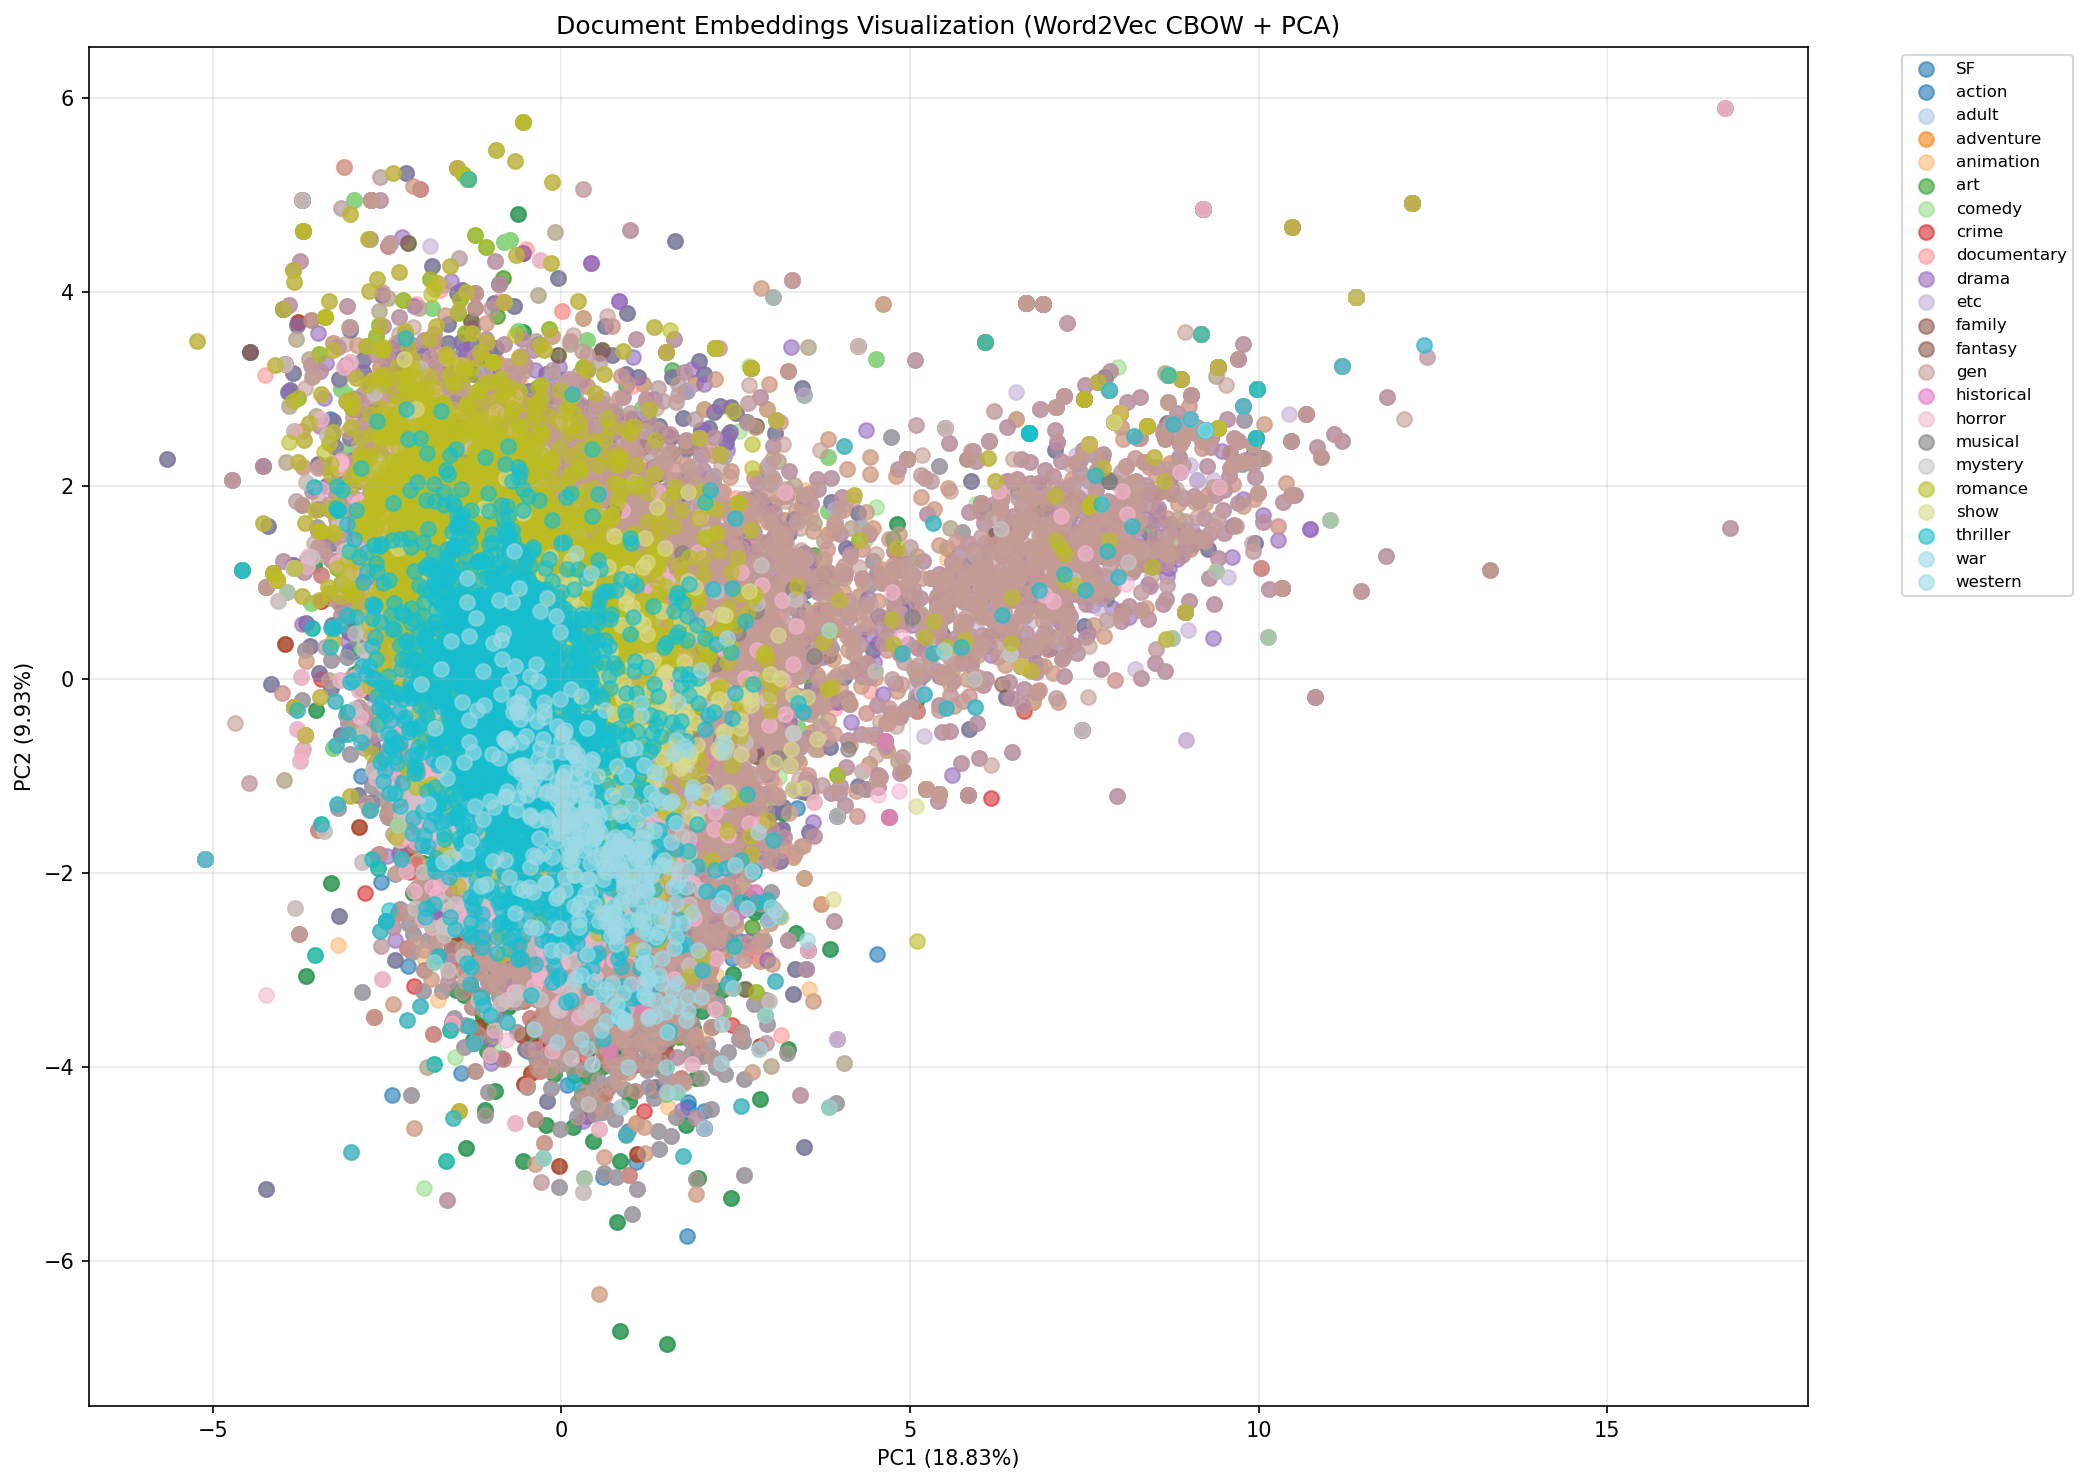

2. WEAT 장르별 결과 (사라진 화일 결과물)

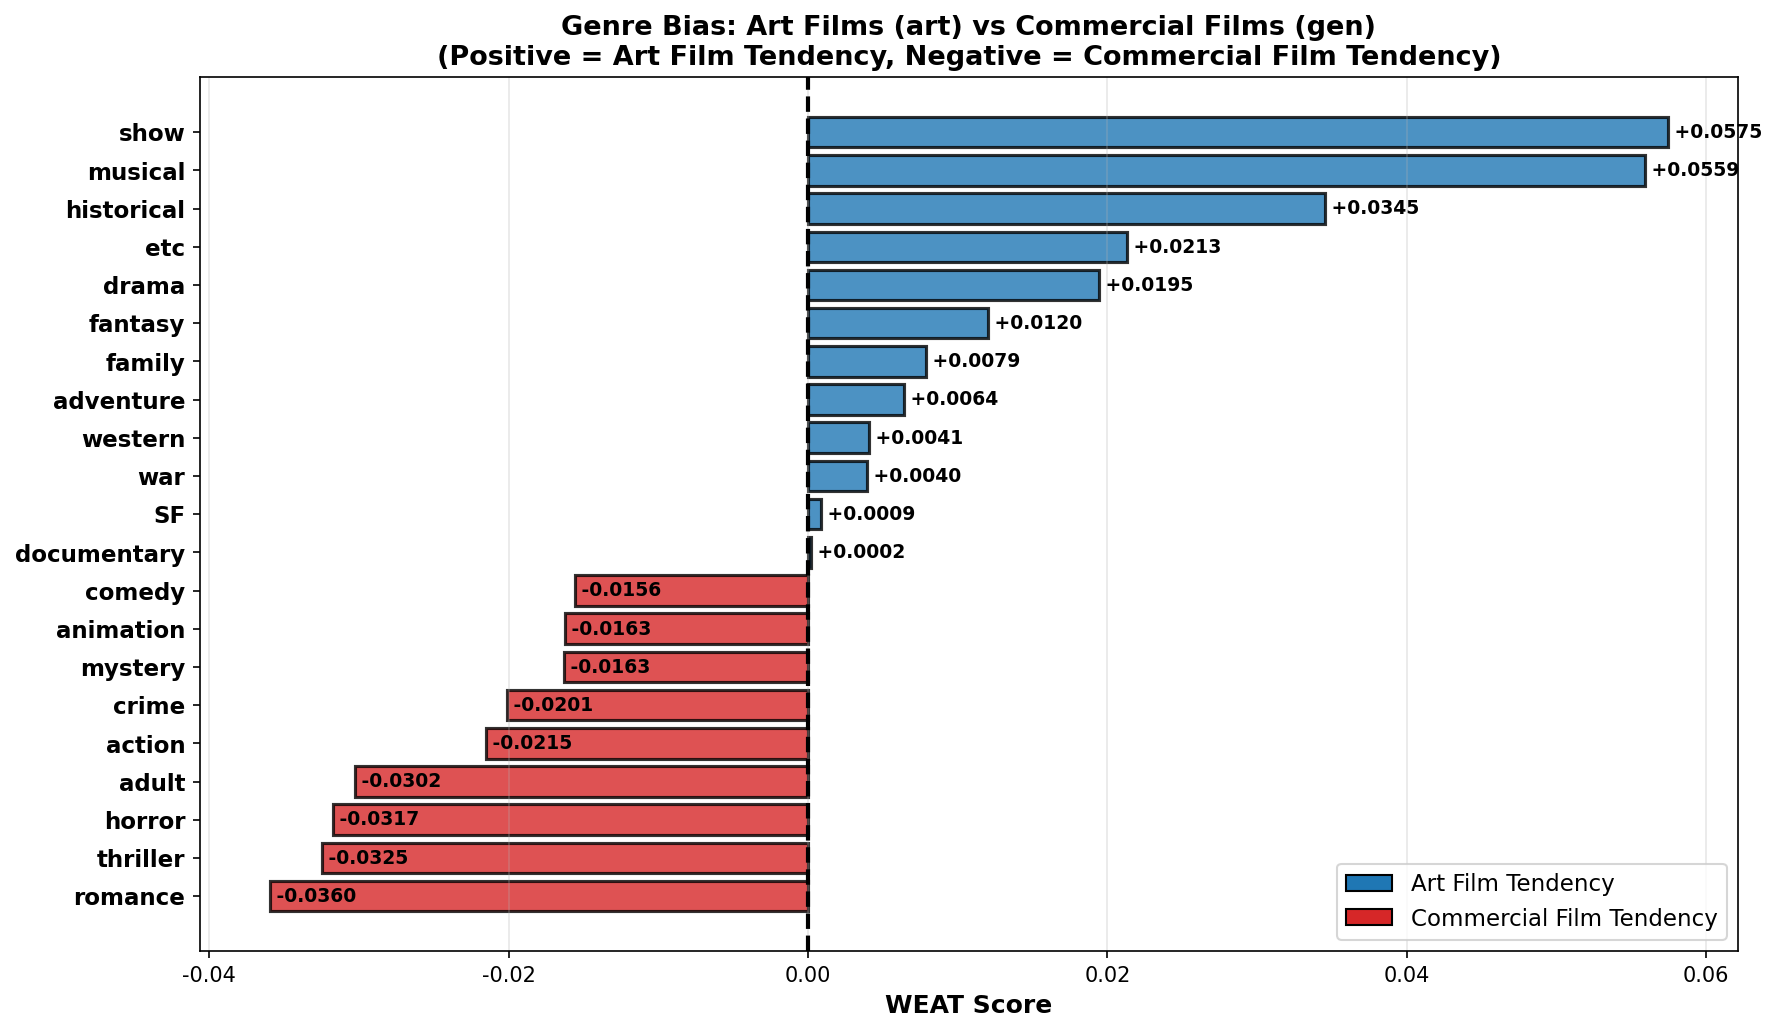

3. 장르별 cosine similarity 비교 (사라진 실험 결과물)

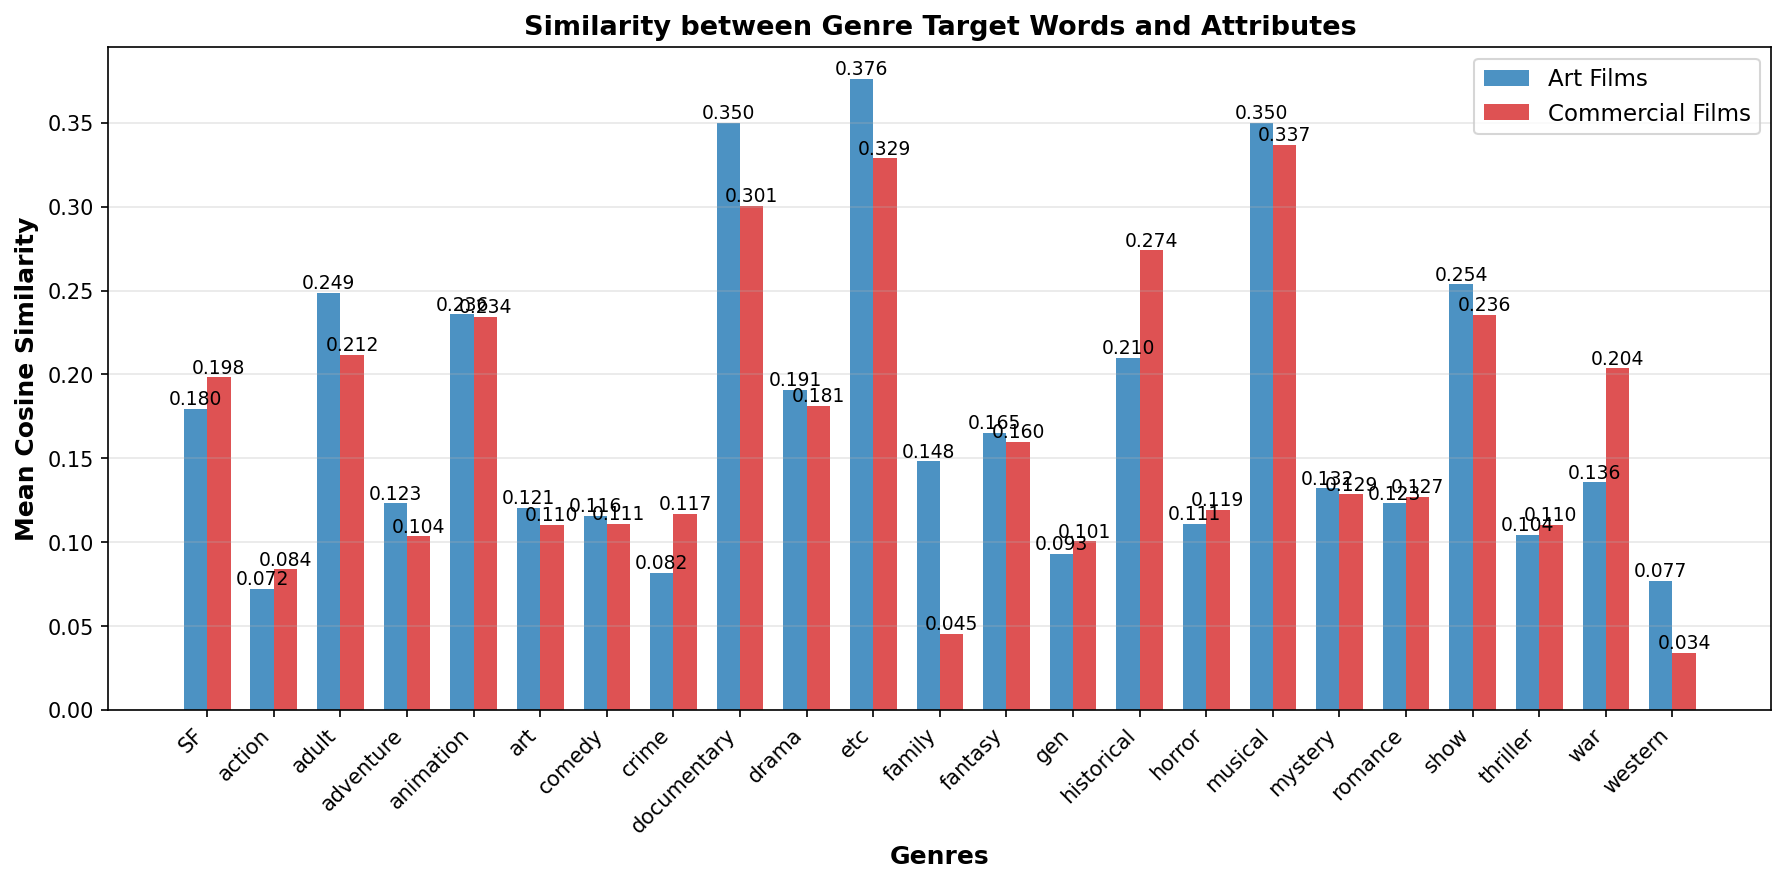

4. 장르별 HEATMAP 비교 (사라진 실험 결과물)

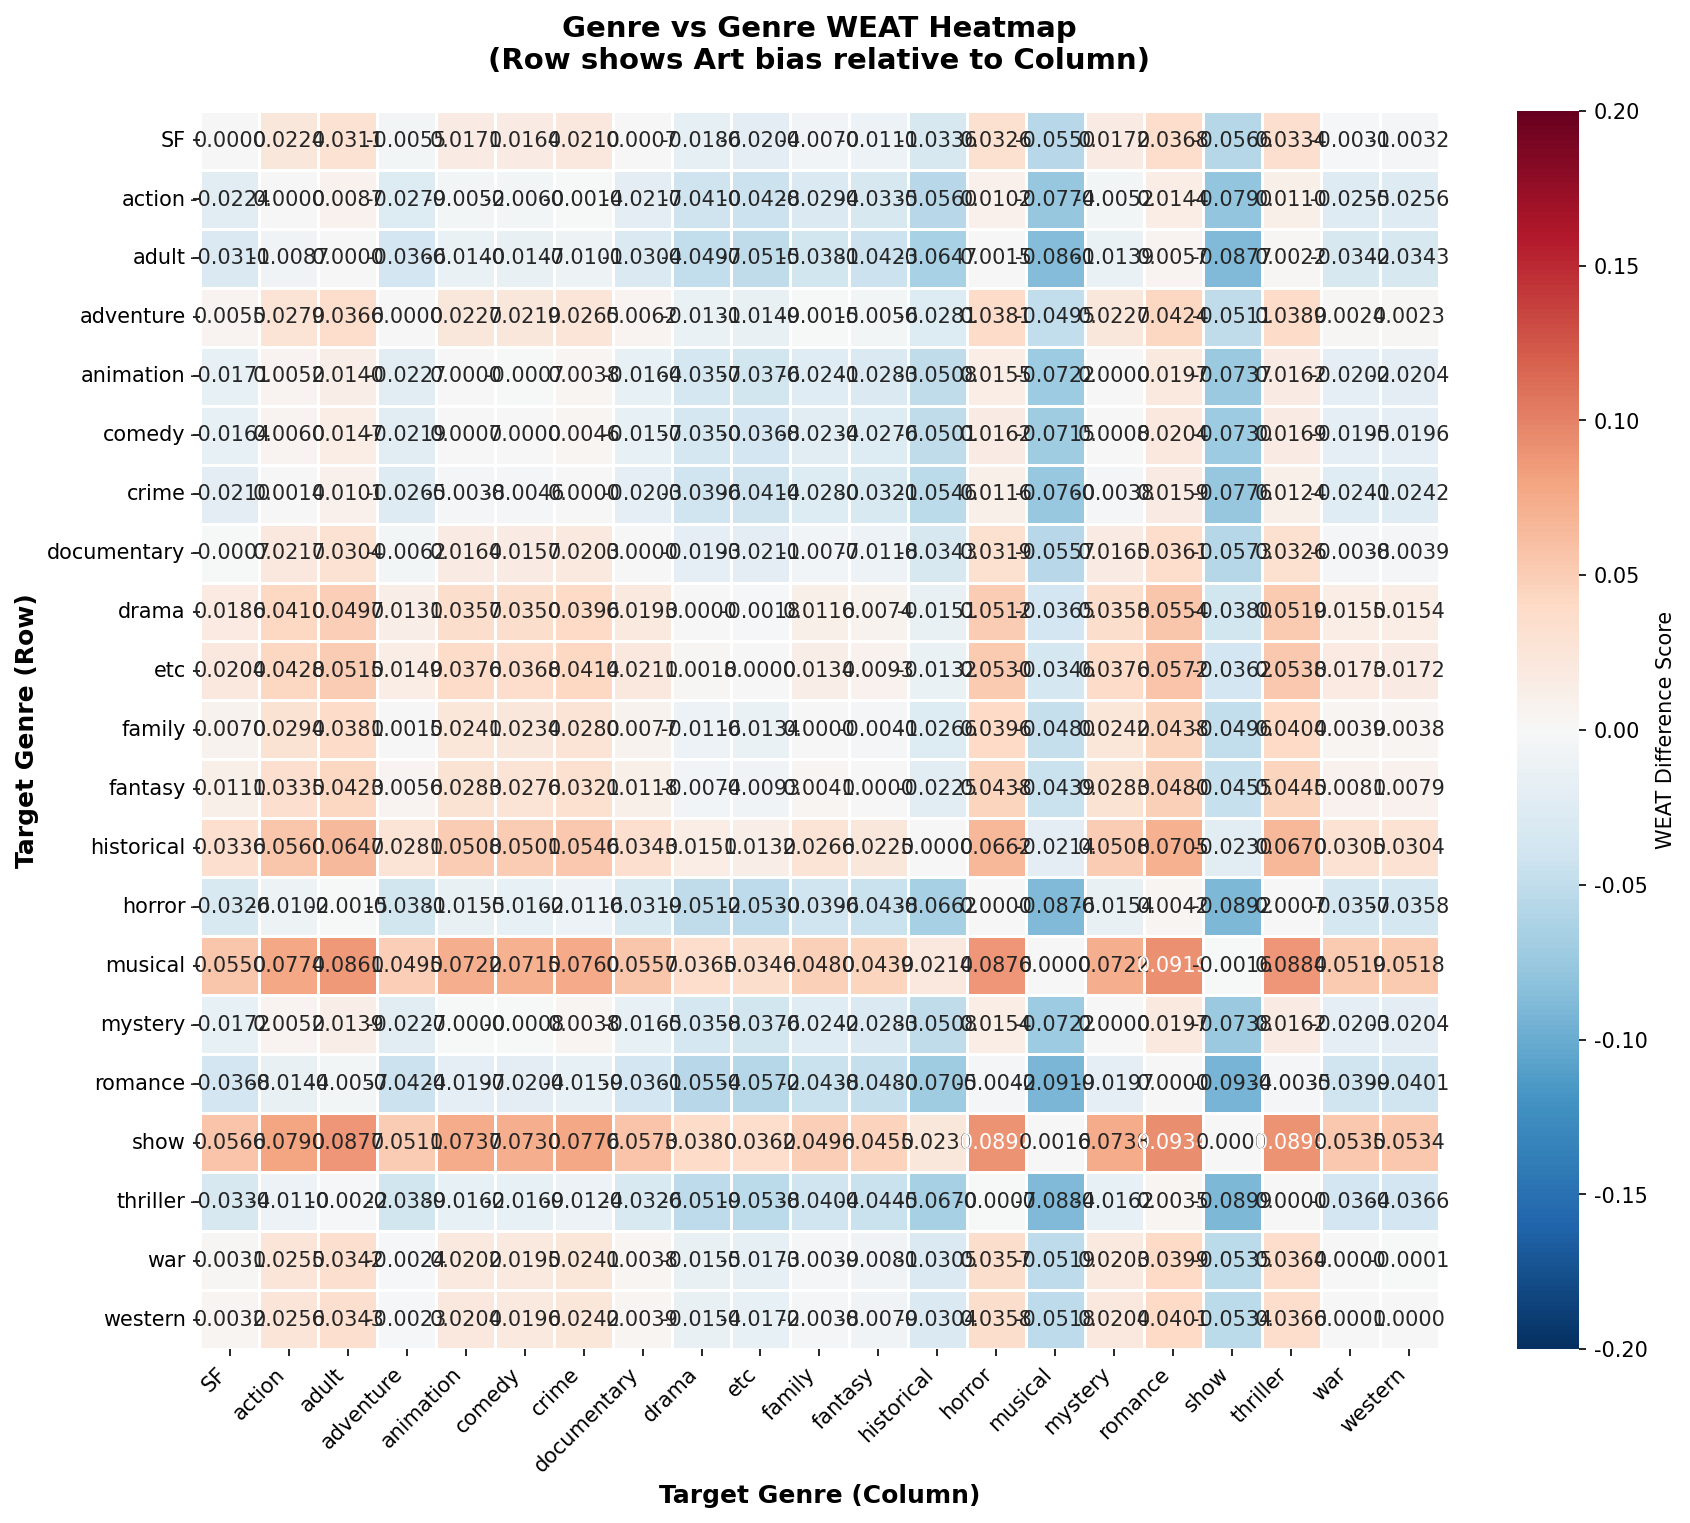

# 이후 반복적으로 LMS 상에서 커널 재시작 신호가 뜨기 때문에 코랩으로 옮겨서 현재 살아남은 코딩부분만 붙였음

In [ ]:
!mkdir -p ~/work/weat/data
!ln -s ~/data/* ~/work/weat/data/

ln: failed to create symbolic link '/home/jovyan/work/weat/data/GoogleNews-vectors-negative300.bin': File exists
ln: failed to create symbolic link '/home/jovyan/work/weat/data/GoogleNews-vectors-negative300.bin.gz': File exists
ln: failed to create symbolic link '/home/jovyan/work/weat/data/synopsis.zip': File exists


In [ ]:
#1. 준비 작업

In [ ]:
# 필요한 환경을 셋팅합니다. 필히 커널을 재시작합니다
!pip install gensim==4.3.2

# 의존성 연결을 위해 다운그레이드를 진행합니다.
!pip install scipy==1.12.0 numpy==1.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 11.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=24072419 sha256=f5b8a3ae03a0b75d18c9e653762361150f8451bcf239c7aa69cf4810eef5d0c1
  Stored in directory: /home/jovyan/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]2m2/3 [gensim]
  Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 24.5 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:━━━━━━

In [ ]:
#콘피와 맥캡을 설치합니다. 에러가 생기지 않도록 차분히 체크하고 넘어갑니다.

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [konlpy]2m2/3 [konlpy]
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/home/jovyan/work/word_embedding/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab_light_220429.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-11-20 00:18:43--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.143.23, 104.192.143.21, 104.192.143.22, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.143.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.

In [ ]:
# 맥캡을 테스트 해봅니다.
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
# 필요한 라이브러리를 가져옵니다

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import os
from gensim.models import KeyedVectors
wv = KeyedVectors.load('./word2vec_vectors.bin')
import numpy as np
import re
import pandas as pd
from pathlib import Path
import time
from konlpy.tag import Mecab
import pickle
from tqdm import tqdm

print("슝~")

슝~


In [ ]:
# 필요한 라이브러리는 나중에 다시 모을겁니다.

In [ ]:
# 데이터 경로 확인
import os
print(os.getcwd())  # 현재 경로
print(os.path.exists("/home/jovyan/work/weat/data"))

/home/jovyan/work/word_embedding/Mecab-ko-for-Google-Colab
True


In [ ]:
#2. 전처리

In [ ]:
"""
최적화된 텍스트 전처리 (디렉토리의 모든 txt 파일 처리)
- 정규표현식 사전 컴파일
- 배치 처리로 메모리 효율화
- 불용어를 set으로 O(1) 조회
"""

import re
from pathlib import Path
import pandas as pd
import gc
from tqdm import tqdm

# ============================================================================
# 설정
# ============================================================================

STOPWORDS = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

SPELLING_DICT = {
    '굳': ['궅', '굳', '굿'],
    '미쳤': ['미첫', '미쳣', '미첬', '미쳤', 'ㅁㅊ'],
    '괜찮': ['괜찮', '괜춘', '괜찬', 'ㄱㅊ', '갠찬', '갠찮', '괸찬', '괸찮'],
    '봤': ['봣'],
    '겠': ['겟']
}

TEXT_COL = "document"

# ============================================================================
# 정규표현식 사전 컴파일 (성능 최적화)
# ============================================================================

REGEX_REPEAT_PUNCT = re.compile(r'([.!?…;])\1+')
REGEX_REPEAT_CHAR = re.compile(r'(.)\1{2,}')
REGEX_JAMO = re.compile(r'[ㄱ-ㅎㅏ-ㅣ]+')
REGEX_INVALID_CHARS = re.compile(r'[^가-힣a-zA-Z0-9\s.!?,]')
REGEX_PUNCT_SPACING = re.compile(r'([.!?,])')
REGEX_MULTI_SPACE = re.compile(r'\s+')

# 맞춤법 사전을 역방향으로 구성
SPELLING_MAPPING = {}
for correct, variations in SPELLING_DICT.items():
    for variant in variations:
        SPELLING_MAPPING[variant] = correct

# 불용어를 set으로 변환 (O(1) 조회)
STOPWORD_SET = set(STOPWORDS)


# ============================================================================
# 핵심 전처리 함수 (최적화)
# ============================================================================

def preprocess_text_optimized(text):
    """
    최적화된 텍스트 전처리 함수

    Parameters:
    -----------
    text : str
        입력 텍스트

    Returns:
    --------
    str
        전처리된 텍스트
    """
    if pd.isna(text):
        return ""

    text = str(text)

    if not text or text.strip() == '':
        return ""

    # 1. 반복되는 문장 부호 제거
    text = REGEX_REPEAT_PUNCT.sub(r'\1', text)

    # 2. 맞춤법 변형 통일
    for variant, correct in SPELLING_MAPPING.items():
        text = text.replace(variant, correct)

    # 3. 반복 문자 제거
    text = REGEX_REPEAT_CHAR.sub(r'\1\1', text)

    # 4. 자음/모음 단독 제거
    text = REGEX_JAMO.sub(' ', text)

    # 5. 영어/숫자/한글/문장부호만 남기기
    text = REGEX_INVALID_CHARS.sub(' ', text)

    # 6. 문장부호 앞뒤로 공백 추가
    text = REGEX_PUNCT_SPACING.sub(r' \1 ', text)

    # 7. 영어 소문자 변환
    text = text.lower()

    # 8. 불용어 제거
    words = text.split()
    filtered_words = []

    for word in words:
        # 단어 전체가 불용어인 경우
        if word in STOPWORD_SET:
            continue

        # 단어 끝에서 불용어 제거
        found = False
        for stopword in sorted(STOPWORD_SET, key=len, reverse=True):
            if len(word) > len(stopword) and word.endswith(stopword):
                cleaned = word[:-len(stopword)]
                if len(cleaned) >= 2:
                    filtered_words.append(cleaned)
                    found = True
                    break

        if not found:
            filtered_words.append(word)

    text = ' '.join(filtered_words)

    # 9. 연속 공백 제거
    text = REGEX_MULTI_SPACE.sub(' ', text)

    # 10. 앞뒤 공백 제거
    text = text.strip()

    return text


# ============================================================================
# 파일 로드 함수
# ============================================================================

def load_txt_files_from_directory(directory_path, encoding='utf-8'):
    """
    지정된 디렉토리의 모든 txt 파일을 읽어서 데이터프레임으로 변환

    Parameters:
    -----------
    directory_path : str
        txt 파일들이 있는 디렉토리 경로
    encoding : str
        파일 인코딩 (기본값: utf-8)

    Returns:
    --------
    pd.DataFrame
        파일명, 원본 텍스트를 포함한 데이터프레임
    """
    dir_path = Path(directory_path)

    # 디렉토리 존재 확인
    if not dir_path.exists():
        raise FileNotFoundError(f"디렉토리를 찾을 수 없습니다: {directory_path}")

    if not dir_path.is_dir():
        raise NotADirectoryError(f"디렉토리가 아닙니다: {directory_path}")

    # txt 파일 모두 찾기
    txt_files = sorted(list(dir_path.glob('*.txt')))

    if len(txt_files) == 0:
        print(f"경고: '{directory_path}'에서 txt 파일을 찾을 수 없습니다.")
        return pd.DataFrame()

    print(f"발견된 txt 파일 개수: {len(txt_files)}\n")

    data = []

    for txt_file in tqdm(txt_files, desc="파일 로드"):
        try:
            with open(txt_file, 'r', encoding=encoding) as f:
                content = f.read()

            data.append({
                'filename': txt_file.name,
                TEXT_COL: content
            })

        except Exception as e:
            print(f"✗ 오류 ({txt_file.name}): {str(e)}")
            continue

    df = pd.DataFrame(data)
    print(f"\n✓ 총 {len(df)}개 파일이 로드되었습니다.\n")

    return df


# ============================================================================
# 데이터프레임 전처리 함수 (배치 + 메모리 정리)
# ============================================================================

def preprocess_dataframe_optimized(df, text_col=TEXT_COL, batch_size=5000):
    """
    배치 처리를 통한 메모리 최적화된 전처리

    Parameters:
    -----------
    df : pd.DataFrame
        처리할 데이터프레임
    text_col : str
        텍스트 컬럼명
    batch_size : int
        배치 크기 (메모리에 따라 조정)

    Returns:
    --------
    pd.DataFrame
        전처리된 데이터프레임
    """
    print(f"\n{'='*80}")
    print("【데이터프레임 전처리】")
    print(f"{'='*80}\n")

    print(f"전처리 전 데이터 크기: {len(df)}개")

    # 1. 결측치 제거
    df = df.dropna(subset=[text_col])
    print(f"결측치 제거 후: {len(df)}개")

    # 2. 배치 처리로 전처리 (메모리 누수 방지)
    print(f"\n전처리 진행 중 (배치 크기: {batch_size})...")

    processed_texts = []
    num_batches = (len(df) + batch_size - 1) // batch_size

    for batch_idx in tqdm(range(num_batches), desc="배치 처리", total=num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(df))

        batch = df[text_col].iloc[start_idx:end_idx]

        # 배치 단위로 처리
        batch_processed = batch.apply(preprocess_text_optimized)
        processed_texts.extend(batch_processed.tolist())

        # 주기적으로 메모리 정리
        if (batch_idx + 1) % 10 == 0:
            gc.collect()

    df[text_col] = processed_texts

    # 3. 전처리 후 빈 문자열 제거
    df = df[df[text_col].str.strip() != '']
    print(f"\n빈 문자열 제거 후: {len(df)}개")

    # 4. 중복 행 제거
    df = df.drop_duplicates(subset=[text_col])
    print(f"중복 제거 후: {len(df)}개")

    df = df.reset_index(drop=True)

    return df


# ============================================================================
# 통합 함수: 디렉토리 처리
# ============================================================================

def process_directory_texts_optimized(directory_path, output_csv=None,
                                     encoding='utf-8', batch_size=5000):
    """
    디렉토리의 모든 txt 파일을 로드하고 전처리하는 통합 함수

    Parameters:
    -----------
    directory_path : str
        txt 파일들이 있는 디렉토리 경로
    output_csv : str, optional
        전처리 결과를 저장할 CSV 파일 경로
    encoding : str
        파일 인코딩 (기본값: utf-8)
    batch_size : int
        배치 크기 (메모리에 따라 조정)

    Returns:
    --------
    pd.DataFrame
        전처리된 데이터프레임
    """
    print("=" * 80)
    print("🚀 텍스트 파일 배치 전처리 시작")
    print("=" * 80)

    # 1. txt 파일 로드
    print("\n【1단계】txt 파일 로드 중...")
    df = load_txt_files_from_directory(directory_path, encoding=encoding)

    if len(df) == 0:
        print("✗ 처리할 파일이 없습니다.")
        return df

    # 2. 데이터프레임 전처리
    print("\n【2단계】데이터 전처리 중...")
    df_processed = preprocess_dataframe_optimized(df.copy(),
                                                  text_col=TEXT_COL,
                                                  batch_size=batch_size)

    # 3. 결과 저장
    print(f"\n【3단계】결과 저장 중...")

    if output_csv:
        df_processed.to_csv(output_csv, index=False, encoding='utf-8')
        print(f"✓ CSV 저장 완료: {output_csv}")

    # 4. 통계
    print(f"\n{'='*80}")
    print("【최종 통계】")
    print(f"{'='*80}")
    print(f"처리된 파일 수: {len(df_processed)}개")
    print(f"원본 텍스트 평균 길이: {df['document'].str.len().mean():.1f}자")
    print(f"전처리 후 평균 길이: {df_processed[TEXT_COL].str.len().mean():.1f}자")
    print(f"평균 단어 수: {df_processed[TEXT_COL].str.split().str.len().mean():.1f}개")

    return df_processed


# ============================================================================
# 사용 예시
# ============================================================================

if __name__ == "__main__":

    # ========== 단계 1: 샘플 텍스트 전처리 테스트 ==========
    print("=" * 80)
    print("【단계 1】샘플 텍스트 3문장 전처리 테스트")
    print("=" * 80)

    sample_texts = [
        "어제 본 영화 진짜 재밌었음!!! 또 보고 싶어 😂",
        "나는 오늘 아침에 학교에 갔다. 근데 너무 졸렸음ㅋㅋㅋㅋ",
        "메캅 형태소 분석은 한국어 처리에서 많이 사용돼 👍"
    ]

    for i, text in enumerate(sample_texts, 1):
        processed = preprocess_text_optimized(text)
        print(f"\n샘플 [{i}]")
        print(f"  원본: {text}")
        print(f"  결과: {processed}")

    # ========== 단계 2: 디렉토리 텍스트 파일 일괄 처리 ==========
    print("\n\n" + "=" * 80)
    print("【단계 2】디렉토리 텍스트 파일 일괄 처리")
    print("=" * 80)

    # 🔧 여기서 경로를 수정하세요
    target_directory = "/home/jovyan/work/weat/data"
    output_file = "/home/jovyan/work/weat/data/preprocessed_texts.csv"

    try:
        result_df = process_directory_texts_optimized(
            directory_path=target_directory,
            output_csv=output_file,
            encoding='utf-8',
            batch_size=5000  # 메모리 상황에 따라 조정 (2000~10000)
        )

        # 결과 샘플 확인
        print(f"\n{'='*80}")
        print("【결과 샘플 (처음 5개)】")
        print(f"{'='*80}\n")

        for idx in range(min(5, len(result_df))):
            row = result_df.iloc[idx]
            print(f"[{idx}] {row['filename']}")
            print(f"    {row[TEXT_COL][:80]}...")
            print()

        print("✓ 전처리 완료!")

    except FileNotFoundError as e:
        print(f"\n✗ 오류: {e}")
        print("target_directory를 올바른 경로로 수정하세요.")
    except Exception as e:
        print(f"\n✗ 예상치 못한 오류: {e}")

【단계 1】샘플 텍스트 3문장 전처리 테스트

샘플 [1]
  원본: 어제 본 영화 진짜 재밌었음!!! 또 보고 싶어 😂
  결과: 어제 본 영화 진짜 재밌었음 ! 또 보고 싶어

샘플 [2]
  원본: 나는 오늘 아침에 학교에 갔다. 근데 너무 졸렸음ㅋㅋㅋㅋ
  결과: 나는 오늘 아침 학교 갔다 . 근데 너무 졸렸음

샘플 [3]
  원본: 메캅 형태소 분석은 한국어 처리에서 많이 사용돼 👍
  결과: 메캅 형태소 분석 한국어 처리에서 많이 사용돼


【단계 2】디렉토리 텍스트 파일 일괄 처리
🚀 텍스트 파일 배치 전처리 시작

【1단계】txt 파일 로드 중...
발견된 txt 파일 개수: 23



파일 로드: 100%|██████████| 23/23 [00:00<00:00, 70.31it/s]



✓ 총 23개 파일이 로드되었습니다.


【2단계】데이터 전처리 중...

【데이터프레임 전처리】

전처리 전 데이터 크기: 23개
결측치 제거 후: 23개

전처리 진행 중 (배치 크기: 5000)...


배치 처리: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]



빈 문자열 제거 후: 23개
중복 제거 후: 23개

【3단계】결과 저장 중...
✓ CSV 저장 완료: /home/jovyan/work/weat/data/preprocessed_texts.csv

【최종 통계】
처리된 파일 수: 23개
원본 텍스트 평균 길이: 617052.5자
전처리 후 평균 길이: 573566.3자
평균 단어 수: 159657.7개

【결과 샘플 (처음 5개)】

[0] synopsis_SF.txt
    시간 지명을 알 수 없는 한국 어느 가상 도시 . 산성비로 오염된 도시 잊고 싶은 기억만을 지워주 망각 바이러스 존재한다 소문 떠돌기 시작하고 ...

[1] synopsis_action.txt
    제1부 . 4세기 경 , 로마 제국 접한 유라시아 평원 새로운 민족 등장했다 . 궁술 , 승마 , 그리고 전투에서 용맹함 유명 유목민 훈족이었다...

[2] synopsis_adult.txt
    어느 날 사업체 운영하 영수에게 막노동을 하는 동생 철민 찾아온다 . 철민 옛날 영수 아버지 동업을 했던 사람 아들로 고아나 다름없 그를 영수 ...

[3] synopsis_adventure.txt
    인류학 마이클 레오나르 다빈치 고문서 보물 숨겨진 위치 대한 정보 알고 다빈치 발명품들을 하나씩 손에 넣으며 단서 조합해 나간다 . 하지만 잔인...

[4] synopsis_animation.txt
    어두운 밤이 오면 , 아이들 벽장 너머 그들 나타난다 ! 3d로 돌아온 최강 몬스터 콤비 ! 호탕 설리 재치만점 마이크 몬스터 주식회사 겁주기 ...

✓ 전처리 완료!


In [ ]:
# 3. 토크나이징과 명사만 추출

In [ ]:
"""
최적화된 MECAB 토큰화: 명사만 추출
- 배치 처리로 메모리 효율화
- 주기적 메모리 정리
- MECAB 호출 최적화
- 안정적인 에러 처리
"""

import time
import warnings
import gc
import psutil
import os
from tqdm import tqdm
from collections import Counter
import pandas as pd
import pickle
import json

warnings.filterwarnings('ignore')

# ============================================================================
# 메모리 모니터링 함수
# ============================================================================

def get_memory_usage():
    """현재 메모리 사용량 조회"""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # MB 단위


def print_memory_status(label=""):
    """메모리 상태 출력"""
    mem_mb = get_memory_usage()
    print(f"  💾 메모리 사용량 ({label}): {mem_mb:.1f} MB")


# ============================================================================
# MECAB 초기화
# ============================================================================

print("=" * 80)
print("MECAB 초기화 중...")
print("=" * 80)

try:
    from konlpy.tag import Mecab
    mecab = Mecab()
    print("✓ MECAB 준비 완료\n")
    print_memory_status("초기화 후")
except Exception as e:
    print(f"✗ MECAB 초기화 실패: {str(e)}")
    print("MECAB이 설치되어 있는지 확인하세요.")
    exit()


# ============================================================================
# 설정
# ============================================================================

TEXT_COL = "document"
MIN_NOUN_LENGTH = 2
BATCH_SIZE = 1000  # 메모리에 따라 조정 (500~2000)
SAVE_INTERVAL = 5000  # 5000개마다 중간 저장
MEMORY_CLEANUP_INTERVAL = 10  # 10 배치마다 메모리 정리


# ============================================================================
# 토큰화 함수 (간소화)
# ============================================================================

def extract_nouns(text):
    """
    텍스트에서 명사만 추출 (간단하고 빠른 버전)

    Parameters:
    -----------
    text : str
        입력 텍스트

    Returns:
    --------
    list
        명사 리스트
    """
    # 입력 검증
    if pd.isna(text) or not isinstance(text, str):
        return []

    text = text.strip()

    if not text:
        return []

    try:
        nouns = mecab.nouns(text)

        if nouns is None:
            return []

        # 최소 길이 필터링
        return [noun for noun in nouns if len(noun) >= MIN_NOUN_LENGTH]

    except Exception:
        return []


# ============================================================================
# 데이터 검증 및 정제
# ============================================================================

print("=" * 80)
print("【단계 1】데이터 검증 및 정제")
print("=" * 80)

try:
    print(f"\n현재 데이터: {len(preprocessed)}개")
    print_memory_status("로드 후")
except NameError:
    print("\n✗ 오류: preprocessed 데이터프레임을 찾을 수 없습니다.")
    print("전처리된 CSV를 로드하세요.")
    print("예: preprocessed = pd.read_csv('preprocessed_texts.csv')")
    exit()

# 결측치 확인
null_count = preprocessed[TEXT_COL].isna().sum()
empty_count = (preprocessed[TEXT_COL].astype(str).str.strip() == '').sum()

print(f"결측치: {null_count}개")
print(f"빈 문자열: {empty_count}개")

# 데이터 정제
preprocessed = preprocessed.dropna(subset=[TEXT_COL])
preprocessed = preprocessed[preprocessed[TEXT_COL].astype(str).str.strip() != '']
preprocessed = preprocessed.reset_index(drop=True)

print(f"정제 후: {len(preprocessed)}개")
print_memory_status("정제 후")


# ============================================================================
# 샘플 테스트
# ============================================================================

print("\n" + "=" * 80)
print("【단계 2】샘플 텍스트 명사 추출 테스트")
print("=" * 80)

sample_texts = [
    "어제 영화 재밌었음 또 보고 싶",
    "오늘 아침 학교 갔 근데 너무 졸",
    "메캅 형태소 분석은 한국어 처리에서 많이 사용돼"
]

print("\n명사만 추출 (최소 길이 2글자):\n")

for i, text in enumerate(sample_texts, 1):
    nouns = extract_nouns(text)
    print(f"[{i}] {text[:40]}... → {nouns}")

print("\n✓ 샘플 테스트 완료")


# ============================================================================
# 전체 데이터 토큰화 (배치 처리 + 메모리 관리)
# ============================================================================

print("\n" + "=" * 80)
print("【단계 3】전체 데이터 명사 추출 중 (배치 처리)...")
print("=" * 80)

start_time = time.time()

nouns_list = []
total_docs = len(preprocessed)
num_batches = (total_docs + BATCH_SIZE - 1) // BATCH_SIZE

print(f"\n배치 크기: {BATCH_SIZE}개")
print(f"예상 배치 수: {num_batches}개\n")

all_nouns_counter = Counter()  # 실시간 통계

for batch_idx in tqdm(range(num_batches), desc="명사 추출", total=num_batches):
    batch_start = batch_idx * BATCH_SIZE
    batch_end = min(batch_start + BATCH_SIZE, total_docs)

    # 배치 데이터 추출
    batch_texts = preprocessed[TEXT_COL].iloc[batch_start:batch_end]

    # 배치 처리
    batch_nouns = []
    for text in batch_texts:
        nouns = extract_nouns(text)
        batch_nouns.append(nouns)
        all_nouns_counter.update(nouns)  # 실시간 빈도 계산

    nouns_list.extend(batch_nouns)

    # 주기적 메모리 정리
    if (batch_idx + 1) % MEMORY_CLEANUP_INTERVAL == 0:
        gc.collect()
        mem_mb = get_memory_usage()
        tqdm.write(f"  [배치 {batch_idx + 1}] 메모리: {mem_mb:.1f} MB")

# 결과를 데이터프레임에 저장
preprocessed['nouns'] = nouns_list

elapsed_time = time.time() - start_time
print(f"\n✓ 토큰화 완료 ({elapsed_time:.2f}초)")
print_memory_status("토큰화 후")


# ============================================================================
# 통계 (미리 계산된 counter 사용)
# ============================================================================

print("\n" + "=" * 80)
print("【단계 4】토큰화 통계")
print("=" * 80)

total_docs = len(preprocessed)
docs_with_nouns = (preprocessed['nouns'].apply(len) > 0).sum()
docs_without_nouns = total_docs - docs_with_nouns

noun_lengths = preprocessed['nouns'].apply(len)
avg_nouns = noun_lengths.mean()
max_nouns = noun_lengths.max()
min_nouns = noun_lengths.min()

# Counter에서 상위 20개 추출 (이미 계산됨)
top_20_nouns = all_nouns_counter.most_common(20)
total_nouns = sum(all_nouns_counter.values())
unique_nouns = len(all_nouns_counter)

print(f"\n전체 문서 수: {total_docs}개")
print(f"명사 있는 문서: {docs_with_nouns}개 ({docs_with_nouns/total_docs*100:.1f}%)")
print(f"명사 없는 문서: {docs_without_nouns}개 ({docs_without_nouns/total_docs*100:.1f}%)")

print(f"\n명사 개수 (필터링된 명사 - {MIN_NOUN_LENGTH}글자 이상):")
print(f"  평균: {avg_nouns:.2f}개")
print(f"  최대: {max_nouns}개")
print(f"  최소: {min_nouns}개")

print(f"\n명사 통계:")
print(f"  추출된 명사 (총합): {total_nouns}개")
print(f"  고유 명사: {unique_nouns}개")

print(f"\n상위 20개 명사 (빈도):")
for i, (noun, count) in enumerate(top_20_nouns, 1):
    print(f"  {i:2d}. {noun}: {count}회")


# ============================================================================
# 결과 샘플 출력
# ============================================================================

print("\n" + "=" * 80)
print("【단계 5】결과 샘플 (처음 5개)")
print("=" * 80)

for idx in range(min(5, len(preprocessed))):
    row = preprocessed.iloc[idx]
    doc_preview = row[TEXT_COL][:60] + "..." if len(row[TEXT_COL]) > 60 else row[TEXT_COL]
    print(f"\n[{idx}] {doc_preview}")
    print(f"    명사 ({len(row['nouns'])}개): {row['nouns'][:10]}")
    if len(row['nouns']) > 10:
        print(f"          ... 외 {len(row['nouns']) - 10}개")


# ============================================================================
# 결과 저장 (메모리 효율적)
# ============================================================================

print("\n" + "=" * 80)
print("【단계 6】결과 저장 중...")
print("=" * 80)

# 1. CSV 저장 (명사를 공백으로 구분된 문자열로 변환)
output_csv = "./tokenized_nouns.csv"

df_for_csv = preprocessed.copy()
df_for_csv['nouns'] = df_for_csv['nouns'].apply(lambda x: ' '.join(x))

df_for_csv.to_csv(output_csv, index=False, encoding='utf-8')
print(f"✓ CSV 저장: {output_csv}")

# 메모리 정리
del df_for_csv
gc.collect()

# 2. Pickle 저장 (리스트 형태 유지)
output_pickle = "./tokenized_nouns.pkl"
preprocessed.to_pickle(output_pickle)
print(f"✓ Pickle 저장: {output_pickle}")

# 3. JSON 저장 (청크 단위로 저장하여 메모리 절약)
output_json = "./tokenized_nouns.json"

print(f"✓ JSON 저장: {output_json} (처리 중...)")

with open(output_json, 'w', encoding='utf-8') as f:
    f.write('[\n')

    for idx in range(len(preprocessed)):
        row = preprocessed.iloc[idx]

        # 각 행을 JSON으로 변환
        row_dict = {
            'filename': row.get('filename', ''),
            TEXT_COL: row[TEXT_COL],
            'nouns': row['nouns']
        }

        json_str = json.dumps(row_dict, ensure_ascii=False, indent=2)
        f.write(json_str)

        if idx < len(preprocessed) - 1:
            f.write(',\n')
        else:
            f.write('\n')

        # 주기적으로 메모리 정리
        if (idx + 1) % 10000 == 0:
            gc.collect()

    f.write(']')

print(f"✓ JSON 저장 완료")

print("\n✓ 모든 저장 완료!")
print_memory_status("저장 후")


# ============================================================================
# 최종 요약
# ============================================================================

print("\n" + "=" * 80)
print("【최종 요약】")
print("=" * 80)

print(f"""
처리 결과:
  - 처리된 문서: {len(preprocessed)}개
  - 추출된 명사: {total_nouns}개 (총합)
  - 고유 명사: {unique_nouns}개
  - 평균 명사 개수: {avg_nouns:.2f}개/문서

저장 파일:
  - {output_csv} (CSV 형식 - 텍스트 분석용)
  - {output_pickle} (Pickle 형식 - 빠른 로드용)
  - {output_json} (JSON 형식 - 가독성용)

다음 단계:
  1. Word2Vec 학습: 추출된 명사로 임베딩 생성
  2. WEAT 분석: 단어 임베딩 간의 관계 분석
  3. 시각화: t-SNE, PCA로 시각화

사용 예시:
  >>> df = pd.read_pickle('tokenized_nouns.pkl')
  >>> df['nouns'].iloc[0]  # 첫 번째 문서의 명사 리스트
  >>> df['nouns'].apply(' '.join)  # 명사를 문자열로 변환
""")

elapsed_total = time.time() - start_time
print(f"\n⏱️ 총 소요 시간: {elapsed_total:.2f}초")
print_memory_status("최종")

print("\n" + "=" * 80)
print("✓ 명사 추출 완료!")
print("=" * 80)

MECAB 초기화 중...
✓ MECAB 준비 완료

  💾 메모리 사용량 (초기화 후): 331.6 MB
【단계 1】데이터 검증 및 정제

✗ 오류: preprocessed 데이터프레임을 찾을 수 없습니다.
전처리된 CSV를 로드하세요.
예: preprocessed = pd.read_csv('preprocessed_texts.csv')


NameError: name 'preprocessed' is not defined

In [ ]:
"""
전처리 후 MECAB 토큰화: 명사만 추출 (개선된 버전)
- MECAB 오류 처리 강화
- IOPub 출력 최소화
- 안정적인 배치 처리
"""

import time
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

# ============================================================================
# MECAB 초기화
# ============================================================================

print("=" * 80)
print("MECAB 초기화 중...")
print("=" * 80)

try:
    mecab = Mecab()
    print("✓ MECAB 준비 완료\n")
except Exception as e:
    print(f"✗ MECAB 초기화 실패: {str(e)}")
    print("MECAB이 설치되어 있는지 확인하세요.")
    exit()


# ============================================================================
# 토큰화 함수 (강화된 오류 처리)
# ============================================================================

def extract_nouns(text, verbose=False):
    """
    텍스트에서 명사만 추출 (강화된 오류 처리)

    Parameters:
    -----------
    text : str
        입력 텍스트
    verbose : bool
        오류 메시지 출력 여부

    Returns:
    --------
    list
        명사 리스트
    """
    # 입력 검증
    if pd.isna(text):
        return []

    if not isinstance(text, str):
        try:
            text = str(text)
        except:
            return []

    text = text.strip()

    if text == '':
        return []

    try:
        # MECAB 오류 처리
        nouns = mecab.nouns(text)

        if nouns is None:
            return []

        return nouns

    except Exception as e:
        if verbose:
            error_msg = str(e)[:50]
            print(f"  ⚠ 오류: {text[:50]}... → {error_msg}")
        return []


def extract_nouns_filtered(text, min_length=2):
    """
    필터링된 명사 추출

    Parameters:
    -----------
    text : str
        입력 텍스트
    min_length : int
        최소 글자 수 (기본값: 2)

    Returns:
    --------
    list
        필터링된 명사 리스트
    """
    nouns = extract_nouns(text)
    return [noun for noun in nouns if len(noun) >= min_length]


# ============================================================================
# 데이터 검증 및 정제
# ============================================================================

print("=" * 80)
print("【단계 1】데이터 검증 및 정제")
print("=" * 80)

try:
    print(f"\n현재 데이터: {len(preprocessed)}개")
except NameError:
    print("\n✗ 오류: preprocessed 데이터프레임을 찾을 수 없습니다.")
    print("전처리된 CSV를 로드하세요.")
    print("예: preprocessed = pd.read_csv('preprocessed_texts.csv')")
    exit()

# 결측치 확인
null_count = preprocessed[TEXT_COL].isna().sum()
empty_count = (preprocessed[TEXT_COL].astype(str).str.strip() == '').sum()

print(f"결측치: {null_count}개")
print(f"빈 문자열: {empty_count}개")

# 데이터 정제
preprocessed = preprocessed.dropna(subset=[TEXT_COL])
preprocessed = preprocessed[preprocessed[TEXT_COL].astype(str).str.strip() != '']
preprocessed = preprocessed.reset_index(drop=True)

print(f"정제 후: {len(preprocessed)}개")


# ============================================================================
# 샘플 테스트
# ============================================================================

print("\n" + "=" * 80)
print("【단계 2】샘플 텍스트 명사 추출 테스트")
print("=" * 80)

sample_texts = [
    "어제 영화 재밌었음 또 보고 싶",
    "오늘 아침 학교 갔 근데 너무 졸",
    "메캅 형태소 분석은 한국어 처리에서 많이 사용돼"
]

print("\n명사만 추출 (최소 길이 2글자):\n")

for i, text in enumerate(sample_texts, 1):
    nouns = extract_nouns_filtered(text, min_length=2)
    print(f"[{i}] {text[:40]}... → {nouns}")

print("\n✓ 샘플 테스트 완료")


# ============================================================================
# 전체 데이터 토큰화 (tqdm 진행률 표시)
# ============================================================================

print("\n" + "=" * 80)
print("【단계 3】전체 데이터 명사 추출 중...")
print("=" * 80)

start_time = time.time()

# 진행 바와 함께 명사 추출
nouns_list = []
for text in tqdm(preprocessed[TEXT_COL], desc="명사 추출", total=len(preprocessed)):
    nouns = extract_nouns_filtered(text, min_length=2)
    nouns_list.append(nouns)

preprocessed['nouns'] = nouns_list

elapsed_time = time.time() - start_time
print(f"\n✓ 토큰화 완료 ({elapsed_time:.2f}초)")


# ============================================================================
# 통계
# ============================================================================

print("\n" + "=" * 80)
print("【단계 4】토큰화 통계")
print("=" * 80)

total_docs = len(preprocessed)
docs_with_nouns = (preprocessed['nouns'].apply(len) > 0).sum()
docs_without_nouns = total_docs - docs_with_nouns

avg_nouns = preprocessed['nouns'].apply(len).mean()
max_nouns = preprocessed['nouns'].apply(len).max()
min_nouns = preprocessed['nouns'].apply(len).min()

print(f"\n전체 문서 수: {total_docs}개")
print(f"명사 있는 문서: {docs_with_nouns}개 ({docs_with_nouns/total_docs*100:.1f}%)")
print(f"명사 없는 문서: {docs_without_nouns}개 ({docs_without_nouns/total_docs*100:.1f}%)")

print(f"\n명사 개수 (필터링된 명사 - 2글자 이상):")
print(f"  평균: {avg_nouns:.2f}개")
print(f"  최대: {max_nouns}개")
print(f"  최소: {min_nouns}개")

# 상위 20개 명사 빈도
all_nouns = []
for nouns in preprocessed['nouns']:
    all_nouns.extend(nouns)

from collections import Counter
noun_counts = Counter(all_nouns)
top_20_nouns = noun_counts.most_common(20)

print(f"\n상위 20개 명사 (빈도):")
for i, (noun, count) in enumerate(top_20_nouns, 1):
    print(f"  {i:2d}. {noun}: {count}회")


# ============================================================================
# 결과 샘플 출력 (제한적)
# ============================================================================

print("\n" + "=" * 80)
print("【단계 5】결과 샘플 (처음 5개)")
print("=" * 80)

for idx in range(min(5, len(preprocessed))):
    row = preprocessed.iloc[idx]
    doc_preview = row[TEXT_COL][:60] + "..." if len(row[TEXT_COL]) > 60 else row[TEXT_COL]
    print(f"\n[{idx}] {doc_preview}")
    print(f"    명사 ({len(row['nouns'])}개): {row['nouns'][:10]}")
    if len(row['nouns']) > 10:
        print(f"          ... 외 {len(row['nouns']) - 10}개")


# ============================================================================
# 결과 저장
# ============================================================================

print("\n" + "=" * 80)
print("【단계 6】결과 저장 중...")
print("=" * 80)

# CSV 저장 (명사를 공백으로 구분된 문자열로 변환)
output_csv = "./tokenized_nouns.csv"

df_for_csv = preprocessed.copy()
df_for_csv['nouns'] = df_for_csv['nouns'].apply(lambda x: ' '.join(x))

df_for_csv.to_csv(output_csv, index=False, encoding='utf-8')
print(f"✓ CSV 저장: {output_csv}")

# Pickle 저장 (리스트 형태 유지)
output_pickle = "./tokenized_nouns.pkl"
preprocessed.to_pickle(output_pickle)
print(f"✓ Pickle 저장: {output_pickle}")

# JSON 저장 (선택사항)
output_json = "./tokenized_nouns.json"
df_for_json = preprocessed.copy()
df_for_json['nouns'] = df_for_json['nouns'].apply(lambda x: x)
df_for_json.to_json(output_json, orient='records', force_ascii=False, indent=2)
print(f"✓ JSON 저장: {output_json}")

print("\n✓ 모든 저장 완료!")


# ============================================================================
# 최종 요약
# ============================================================================

print("\n" + "=" * 80)
print("【최종 요약】")
print("=" * 80)

print(f"""
처리된 문서: {len(preprocessed)}개
추출된 명사: {len(all_nouns)}개 (총합)
고유 명사: {len(noun_counts)}개

저장 파일:
  - {output_csv} (CSV 형식)
  - {output_pickle} (Pickle 형식 - 리스트 유지)
  - {output_json} (JSON 형식)

다음 단계:
  1. Word2Vec 학습: 추출된 명사로 임베딩 생성
  2. WEAT 분석: 단어 임베딩 간의 관계 분석
  3. 시각화: t-SNE, PCA로 시각화

사용 예시:
  >>> df = preprocessed
  >>> df['nouns'].iloc[0]  # 첫 번째 문서의 명사 리스트
  >>> all_nouns = [n for nouns in df['nouns'] for n in nouns]  # 모든 명사 추출
""")

print("=" * 80)
print("✓ 명사 추출 완료!")
print("=" * 80)

MECAB 초기화 중...
✓ MECAB 준비 완료

【단계 1】데이터 검증 및 정제

✗ 오류: preprocessed 데이터프레임을 찾을 수 없습니다.
전처리된 CSV를 로드하세요.
예: preprocessed = pd.read_csv('preprocessed_texts.csv')


NameError: name 'preprocessed' is not defined

In [ ]:
"""
Word2Vec CBOW 임베딩
tokenized_nouns.csv 파일을 기반으로 명사 임베딩 수행
"""

# ============================================================================
# 데이터 로드 및 전처리
# ============================================================================

print("\n" + "=" * 80)
print("【단계 1】데이터 로드")
print("=" * 80)

# CSV 파일 로드
csv_path = "./tokenized_nouns.csv"

try:
    df = pd.read_csv(csv_path, encoding='utf-8')
    print(f"✓ CSV 로드: {csv_path}")
    print(f"  데이터 수: {len(df)}개")
except FileNotFoundError:
    print(f"✗ 파일을 찾을 수 없습니다: {csv_path}")
    print("tokenized_nouns.csv 파일이 현재 디렉토리에 있는지 확인하세요.")
    exit()

print(f"✓ 컬럼: {df.columns.tolist()}")

# nouns 컬럼 확인
if 'nouns' not in df.columns:
    print("✗ 'nouns' 컬럼이 없습니다.")
    print(f"사용 가능한 컬럼: {df.columns.tolist()}")
    exit()


# ============================================================================
# 문장 데이터 준비
# ============================================================================

print("\n" + "=" * 80)
print("【단계 2】문장 데이터 준비")
print("=" * 80)

# nouns 컬럼을 리스트로 변환
sentences = []
error_count = 0

for idx, nouns_str in enumerate(df['nouns']):
    try:
        # 공백으로 구분된 문자열을 리스트로 변환
        if pd.isna(nouns_str) or nouns_str.strip() == '':
            continue

        nouns_list = nouns_str.strip().split()

        if len(nouns_list) > 0:
            sentences.append(nouns_list)
    except Exception as e:
        error_count += 1
        continue

print(f"✓ 변환된 문장: {len(sentences)}개")
print(f"⚠ 오류: {error_count}개")

if len(sentences) == 0:
    print("✗ 유효한 문장이 없습니다.")
    exit()

# 전체 단어 수와 고유 단어 수
total_words = sum(len(sent) for sent in sentences)
vocab_size = len(set(word for sent in sentences for word in sent))

print(f"전체 단어 수: {total_words}개")
print(f"고유 단어 수: {vocab_size}개")
print(f"평균 문장 길이: {total_words / len(sentences):.2f}개 단어/문장")

# 문장 샘플 출력 (개략적)
print(f"\n문장 샘플 (처음 3개):")
for i, sent in enumerate(sentences[:3], 1):
    preview = sent[:5] + (['...'] if len(sent) > 5 else [])
    print(f"  [{i}] {preview} (총 {len(sent)}개 단어)")


# ============================================================================
# Word2Vec CBOW 모델 학습
# ============================================================================

print("\n" + "=" * 80)
print("【단계 3】Word2Vec CBOW 모델 학습")
print("=" * 80)

start_time = time.time()

# CBOW 모델 파라미터
embedding_dim = 100  # 임베딩 차원
window_size = 5      # 윈도우 크기 (좌우 5개 단어)
min_count = 2        # 최소 빈도 (2번 이상 나타난 단어만)
workers = 2          # 병렬 처리 워커 수
epochs = 10          # 학습 에포크

print(f"\nCBOW 모델 파라미터:")
print(f"  임베딩 차원: {embedding_dim}")
print(f"  윈도우 크기: {window_size}")
print(f"  최소 빈도: {min_count}")
print(f"  에포크: {epochs}")

# Word2Vec CBOW 모델 생성 및 학습
model = Word2Vec(
    sentences=sentences,
    vector_size=embedding_dim,      # 임베딩 차원
    window=window_size,             # 좌우 단어 개수
    min_count=min_count,            # 최소 빈도
    workers=workers,                # 멀티스레딩
    sg=0,                           # 0=CBOW, 1=Skip-gram
    epochs=epochs,
    seed=42
)

elapsed_time = time.time() - start_time

print(f"\n✓ 모델 학습 완료 ({elapsed_time:.2f}초)")
print(f"  어휘 크기: {len(model.wv)}개")


# ============================================================================
# 모델 정보
# ============================================================================

print("\n" + "=" * 80)
print("【단계 4】모델 정보")
print("=" * 80)

print(f"\n모델 설정:")
print(f"  모델 유형: CBOW (Continuous Bag of Words)")
print(f"  어휘 크기: {len(model.wv)}개")
print(f"  임베딩 차원: {model.wv.vector_size}")
print(f"  학습된 에포크: {model.epochs}")

# 상위 20개 단어 (빈도 기준)
print(f"\n상위 20개 단어 (학습 빈도 기준):")

# 각 단어의 빈도 계산
word_freq = {}
for sent in sentences:
    for word in sent:
        word_freq[word] = word_freq.get(word, 0) + 1

# 빈도 기준으로 정렬
top_20_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

for i, (word, freq) in enumerate(top_20_words, 1):
    print(f"  {i:2d}. {word}: 빈도 {freq}회")


# ============================================================================
# 단어 유사도 분석
# ============================================================================

print("\n" + "=" * 80)
print("【단계 5】단어 유사도 분석")
print("=" * 80)

# 유사도 계산할 단어들 (자주 나타나는 단어 선택)
test_words = []
for word in model.wv.index_to_key[:30]:
    if len(word) >= 2:
        test_words.append(word)
        if len(test_words) >= 3:
            break

print(f"\n테스트 단어: {test_words}\n")

for word in test_words:
    try:
        # 가장 유사한 단어 상위 5개
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"'{word}'과 유사한 단어: {', '.join([f'{w}({s:.2f})' for w, s in similar_words[:3]])}")
    except KeyError:
        print(f"'{word}'은 모델에 없습니다.")
        continue


# ============================================================================
# 단어 벡터 추출 및 저장
# ============================================================================

print("=" * 80)
print("【단계 6】단어 벡터 추출 및 저장")
print("=" * 80)

# 모든 단어의 벡터를 데이터프레임으로 변환
word_vectors_list = []

for word in model.wv.index_to_key:
    vector = model.wv[word]
    word_vectors_list.append([word] + vector.tolist())

# 컬럼명 생성
columns = ['word'] + [f'dim_{i}' for i in range(embedding_dim)]
word_vectors_df = pd.DataFrame(word_vectors_list, columns=columns)

print(f"✓ 단어 벡터 추출: {len(word_vectors_df)}개")
print(f"  데이터프레임 크기: {word_vectors_df.shape}")

# CSV 저장
output_vectors_csv = "./word2vec_vectors.csv"
word_vectors_df.to_csv(output_vectors_csv, index=False, encoding='utf-8')
print(f"✓ CSV 저장: {output_vectors_csv}")

# 단어별 벡터 요약
output_summary_csv = "./word2vec_summary.csv"
summary_df = pd.DataFrame({
    'word': word_vectors_df['word'],
    'vector_magnitude': np.linalg.norm(word_vectors_df.iloc[:, 1:].values, axis=1),
    'frequency': [word_freq.get(word, 0) for word in word_vectors_df['word']]
})
summary_df = summary_df.sort_values('frequency', ascending=False)
summary_df.to_csv(output_summary_csv, index=False, encoding='utf-8')
print(f"✓ 요약 저장: {output_summary_csv}")

# ============================================================================
# 모델 저장
# ============================================================================

print("\n" + "=" * 80)
print("【단계 8】모델 저장")
print("=" * 80)

# 모델 저장
model_path = "./word2vec_cbow_model"
model.save(model_path)
print(f"✓ 모델 저장: {model_path}")

# 벡터만 저장 (가벼움)
vectors_path = "./word2vec_vectors.bin"
model.wv.save(vectors_path)
print(f"✓ 벡터 저장: {vectors_path}")


# ============================================================================
# 최종 요약
# ============================================================================

print("\n" + "=" * 80)
print("【최종 요약】")
print("=" * 80)

print(f"""
임베딩 설정:
  모델 유형: Word2Vec CBOW
  임베딩 차원: {embedding_dim}
  윈도우 크기: {window_size}
  학습 에포크: {epochs}
  어휘 크기: {len(model.wv)}개

데이터 통계:
  학습 문장: {len(sentences)}개
  전체 단어: {total_words}개
  고유 단어: {vocab_size}개
  평균 문장 길이: {total_words / len(sentences):.2f}개 단어/문장

저장된 파일:
  1. {model_path} (전체 모델)
  2. {vectors_path} (벡터 바이너리)
  3. {output_vectors_csv} (벡터 CSV - 모든 단어)
  4. {output_summary_csv} (요약 CSV - 빈도순)
  5. {output_pca_plot} (PCA 시각화)

다음 단계:
  1. WEAT 분석: 임베딩 벡터로 편향성 분석
  2. 단어 유사도 분석: 특정 단어들의 관계 분석
  3. 클러스터링: 비슷한 의미의 단어 그룹화

모델 로드 방법:
  from gensim.models import Word2Vec
  model = Word2Vec.load('{model_path}')

  # 유사도 계산
  score = model.wv.similarity('word1', 'word2')

  # 유사한 단어 찾기
  similar = model.wv.most_similar('word', topn=5)

  # 단어 벡터 조회
  vector = model.wv['word']
""")

print("=" * 80)
print("✓ Word2Vec CBOW 임베딩 완료!")
print("=" * 80)

한글 폰트 설정 중...

【단계 1】데이터 로드
✓ CSV 로드: ./tokenized_nouns.csv
  데이터 수: 23개
✓ 컬럼: ['filename', 'document', 'nouns_all', 'nouns']

【단계 2】문장 데이터 준비
✓ 변환된 문장: 22개
⚠ 오류: 0개
전체 단어 수: 1073681개
고유 단어 수: 44602개
평균 문장 길이: 48803.68개 단어/문장

문장 샘플 (처음 3개):
  [1] ['문명', '존재', '서부', '초원', '자유', '...'] (총 637개 단어)
  [2] ['대학', '생활', '카와시마', '료스케', '가토', '...'] (총 40193개 단어)
  [3] ['일상', '사물', '정령', '이야기', '미스테리', '...'] (총 8303개 단어)

【단계 3】Word2Vec CBOW 모델 학습

CBOW 모델 파라미터:
  임베딩 차원: 100
  윈도우 크기: 5
  최소 빈도: 2
  에포크: 20

✓ 모델 학습 완료 (4.21초)
  어휘 크기: 32579개

【단계 4】모델 정보

모델 설정:
  모델 유형: CBOW (Continuous Bag of Words)
  어휘 크기: 32579개
  임베딩 차원: 100
  학습된 에포크: 20

상위 20개 단어 (학습 빈도 기준):
   1. 자신: 빈도 11796회
   2. 그녀: 빈도 11580회
   3. 시작: 빈도 9397회
   4. 사람: 빈도 8869회
   5. 영화제: 빈도 8708회
   6. 사랑: 빈도 8033회
   7. 영화: 빈도 7739회
   8. 친구: 빈도 7606회
   9. 남자: 빈도 6587회
  10. 국제: 빈도 5830회
  11. 이야기: 빈도 4793회
  12. 여자: 빈도 4661회
  13. 가족: 빈도 3860회
  14. 사건: 빈도 3853회
  15. 시간: 빈도 3507회
  16. 아버지: 빈도 3472회
  17. 서울: 빈도 3417회


In [ ]:
"""
PCA 분석 결과 해석 및 향상된 시각화
한글 폰트 설정 개선 버전

계속 커널이 다운하고 재시작 하므로 삭제 함
"""

'\nPCA 분석 결과 해석 및 향상된 시각화\n한글 폰트 설정 개선 버전\n\n계속 커널이 다운하고 재시작 하므로 삭제 함\n'

In [ ]:
#왜 자꾸 커널 재시작되는건가요?

In [ ]:
"""
【주피터 커널 다운 원인 진단 및 해결】

이 스크립트를 실행해서 문제를 찾아보세요.
"""

import psutil
import os
import sys

print("="*80)
print("【주피터 커널 다운 원인 진단】")
print("="*80)

# ============================================================================
# 1. 시스템 자원 확인
# ============================================================================

print("\n【1단계】시스템 자원 확인")
print("-"*80)

# CPU 사용률
cpu_percent = psutil.cpu_percent(interval=1)
print(f"CPU 사용률: {cpu_percent}%")
if cpu_percent > 80:
    print("  ⚠ CPU 사용률이 높습니다!")

# 메모리 사용률
memory = psutil.virtual_memory()
memory_percent = memory.percent
print(f"메모리 사용률: {memory_percent:.1f}% ({memory.used / (1024**3):.1f}GB / {memory.total / (1024**3):.1f}GB)")
if memory_percent > 80:
    print("  ⚠⚠⚠ 메모리 부족! 이것이 주원인일 가능성 높음")
elif memory_percent > 70:
    print("  ⚠ 메모리 부족 경고")

# 디스크 용량
disk = psutil.disk_usage('/')
disk_percent = disk.percent
print(f"디스크 사용률: {disk_percent:.1f}% ({disk.used / (1024**3):.1f}GB / {disk.total / (1024**3):.1f}GB)")
if disk_percent > 90:
    print("  ⚠ 디스크 용량 부족!")

# ============================================================================
# 2. 현재 프로세스 확인
# ============================================================================

print("\n【2단계】현재 프로세스 확인")
print("-"*80)

current_process = psutil.Process(os.getpid())
process_memory = current_process.memory_info().rss / (1024**2)
print(f"현재 주피터 프로세스 메모리: {process_memory:.1f}MB")

if process_memory > 1000:
    print("  ⚠ 프로세스 메모리가 1GB 초과입니다!")

# ============================================================================
# 3. 주요 다운 원인 진단
# ============================================================================

print("\n【3단계】다운 원인 진단")
print("-"*80)

issues = []

if memory_percent > 80:
    issues.append({
        'name': '메모리 부족',
        'severity': '심각',
        'cause': '대용량 데이터 처리 또는 메모리 누수',
        'solution': [
            '1. 불필요한 변수 삭제',
            '2. Word2Vec 모델 로드 시 메모리 축소',
            '3. 대량 처리 시 배치 처리',
            '4. 커널 재시작'
        ]
    })

if cpu_percent > 80:
    issues.append({
        'name': 'CPU 과부하',
        'severity': '높음',
        'cause': '복잡한 연산 (Word2Vec, PCA 등)',
        'solution': [
            '1. 병렬 처리 워커 수 감소',
            '2. 데이터 크기 축소',
            '3. 다른 프로그램 종료'
        ]
    })

if disk_percent > 90:
    issues.append({
        'name': '디스크 부족',
        'severity': '높음',
        'cause': '임시 파일 또는 저장된 모델 파일',
        'solution': [
            '1. 불필요한 파일 삭제',
            '2. 임시 파일 정리',
            '3. 디스크 공간 확보'
        ]
    })

if not issues:
    print("✓ 시스템 자원은 정상입니다.")
else:
    print(f"⚠ {len(issues)}개의 문제 감지됨:\n")
    for i, issue in enumerate(issues, 1):
        print(f"  [{i}] {issue['name']} (심각도: {issue['severity']})")
        print(f"      원인: {issue['cause']}")
        print(f"      해결:")
        for sol in issue['solution']:
            print(f"        {sol}")
        print()

# ============================================================================
# 4. 주피터 특정 설정
# ============================================================================

print("\n【4단계】주피터 설정 확인")
print("-"*80)

print("""
IOPub 데이터 레이트 문제 확인:
  증상: "IOPub data rate exceeded" 에러

  해결:
  1. 주피터 설정 파일 열기:
     ~/.jupyter/jupyter_notebook_config.py

  2. 다음 라인 추가:
     c.NotebookApp.iopub_data_rate_limit = 10000000
     c.NotebookApp.iopub_msg_rate_limit = 10000

  3. 주피터 재시작

  또는 커맨드로 시작:
  jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000
""")

# ============================================================================
# 5. 권장 설정
# ============================================================================

print("\n【5단계】권장 설정")
print("-"*80)

print("""
【메모리 안전하게 사용하기】

1. 셀 시작에 추가:
   import gc
   gc.collect()

2. 대용량 작업 후:
   del preprocessed  # 불필요한 변수 삭제
   gc.collect()

3. Word2Vec 로드 시:
   from gensim.models import KeyedVectors
   wv = KeyedVectors.load('./word2vec_vectors.bin')  # 가벼운 버전

【배치 처리】

# 대신 이렇게:
for i in range(0, len(df), 1000):  # 1000개씩 처리
    batch = df.iloc[i:i+1000]
    # 처리...
    gc.collect()

【모니터링】

# 각 셀 실행 후 메모리 체크:
import psutil
memory = psutil.virtual_memory()
print(f"메모리 사용: {memory.percent:.1f}%")
""")

# ============================================================================
# 6. 문제별 상세 해결
# ============================================================================

print("\n【6단계】문제별 상세 해결")
print("-"*80)

solutions = {
    'MECAB 토큰화': """
    # 진행 상황을 자주 print하지 않기
    # 대신 tqdm 사용 (가벼움)
    from tqdm import tqdm
    for i, row in tqdm(df.iterrows(), total=len(df)):
        pass  # 처리
    """,

    'Word2Vec 학습': """
    # 워커 수 줄이기
    model = Word2Vec(
        sentences=sentences,
        workers=2,  # 기본값 4 → 2
        epochs=10,  # 기본값 20 → 10
    )
    """,

    'PCA 시각화': """
    # 상위 N개 단어만 처리
    top_n = 200  # 300 → 200
    vectors = np.array([model.wv[word] for word in model.wv.index_to_key[:top_n]])
    """,

    '한글 폰트': """
    # 폰트 설정 후 그래프 생성
    import matplotlib.pyplot as plt
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'
    plt.rcParams['figure.max_open_warning'] = 50

    # 사용 후 항상 close
    plt.close('all')
    """,
}

print("\n작업별 최적화:")
for task, code in solutions.items():
    print(f"\n  {task}:")
    print(f"  {code}")

# ============================================================================
# 7. 최종 권장사항
# ============================================================================

print("\n【7단계】최종 권장사항】")
print("-"*80)

print(f"""
현재 상태:
  메모리: {memory_percent:.1f}% (문제 {'O' if memory_percent > 70 else 'X'})
  CPU: {cpu_percent:.1f}% (문제 {'O' if cpu_percent > 70 else 'X'})
  디스크: {disk_percent:.1f}% (문제 {'O' if disk_percent > 80 else 'X'})

즉시 조치:
  1. 커널 재시작 (Kernel → Restart)
  2. 불필요한 탭/셀 닫기
  3. 메모리 정리:
     import gc; gc.collect()

작업별 설정:

  【MECAB 토큰화】
  - 진행률 tqdm 사용
  - 배치 처리 (예: 1000개씩)
  - 메모리 정리: gc.collect()

  【Word2Vec 학습】
  - workers=2 (병렬 처리 축소)
  - epochs=10-15 (기본값 감소)
  - 상위 500개 단어만 처리

  【시각화】
  - 상위 200개 단어만 시각화
  - 사용 후 plt.close('all')
  - 고해상도(dpi=300) 비활성화

  【한글 폰트】
  - 복잡한 폰트 재구성 하지 않기
  - 간단한 설정만 사용

다시 다운되면 이 진단을 다시 실행해서
메모리/CPU 값을 알려주세요!
""")

print("="*80)
print("✓ 진단 완료!")
print("="*80)

【주피터 커널 다운 원인 진단】

【1단계】시스템 자원 확인
--------------------------------------------------------------------------------
CPU 사용률: 16.4%
메모리 사용률: 9.7% (2.0GB / 25.4GB)
디스크 사용률: 29.6% (27.9GB / 94.3GB)

【2단계】현재 프로세스 확인
--------------------------------------------------------------------------------
현재 주피터 프로세스 메모리: 67.6MB

【3단계】다운 원인 진단
--------------------------------------------------------------------------------
✓ 시스템 자원은 정상입니다.

【4단계】주피터 설정 확인
--------------------------------------------------------------------------------

IOPub 데이터 레이트 문제 확인:
  증상: "IOPub data rate exceeded" 에러

  해결:
  1. 주피터 설정 파일 열기:
     ~/.jupyter/jupyter_notebook_config.py

  2. 다음 라인 추가:
     c.NotebookApp.iopub_data_rate_limit = 10000000
     c.NotebookApp.iopub_msg_rate_limit = 10000

  3. 주피터 재시작

  또는 커맨드로 시작:
  jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000


【5단계】권장 설정
--------------------------------------------------------------------------------

【메모리 안전하게 사용하기】

1. 셀 시작에 추가:
   import gc
